# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

> **Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results and verify all analyses independently.

## Introduction

This notebook explores Dandiset 001433, which contains behavioral and electrophysiological data from freely-behaving mice. The dataset includes recordings of sniffing, video, and olfactory bulb (OB) electrophysiology in mice without any stimulus, reward, or task. The purpose of this notebook is to demonstrate how to access and visualize key aspects of the dataset.

## Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import pandas as pd
import seaborn as sns
from IPython.display import display

## Exploring the Dandiset Metadata

In [2]:
# Connect to the DANDI API and retrieve metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")
metadata = dandiset.get_raw_metadata()

# Display basic information about the dandiset
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"License: {metadata['license'][0]}")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903
License: spdx:CC-BY-4.0


## Exploring Available Files

In [3]:
# List assets in the dandiset
assets = list(dandiset.get_assets())
print(f"Total number of assets: {len(assets)}")

# Print the first 10 files
print("\nFirst 10 files:")
for i, asset in enumerate(assets[:10]):
    print(f"{i+1}: {asset.path}")

Total number of assets: 27

First 10 files:
1: sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
2: sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb
3: sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb
4: sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb
5: sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb
6: sub-4127/sub-4127_ses-20250507T153010_ecephys.nwb
7: sub-4127/sub-4127_ses-20250507T153020_ecephys.nwb
8: sub-4127/sub-4127_ses-20250507T153032_ecephys.nwb
9: sub-4127/sub-4127_ses-20250507T153048_ecephys.nwb
10: sub-4127/sub-4127_ses-20250507T153100_ecephys.nwb


## Examining the Structure of an NWB File

Let's examine the structure of one of the NWB files to understand what data is available.

In [4]:
# Select the first file for exploration
selected_file = "sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb"
asset = next(dandiset.get_assets_by_glob(selected_file))
url = asset.download_url

# Stream the file without downloading it
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age}")
print(f"Keywords: {list(nwb.keywords[:])}")

Session description: LFP and sniff recording
Identifier: 4122_4
Session start time: 2025-05-07 15:29:27.359523-07:00
Experimenter: ('Rafilson, Sidney',)
Subject ID: 4122
Subject species: Mus musculus
Subject sex: M
Subject age: P90D
Keywords: ['olfactory bulb', 'LFP', 'sniffing', 'mouse', 'neuroscience']


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring Acquisition Data

The NWB file contains several types of acquisition data. Let's examine the LFP (Local Field Potential) and sniffing data.

In [5]:
# Examine available acquisition data
print("Available acquisition data:")
for key in nwb.acquisition.keys():
    print(f"- {key}")

# Get information about LFP data
lfp = nwb.acquisition["LFP"]
print(f"\nLFP data shape: {lfp.data.shape}")
print(f"LFP sampling rate: {lfp.rate} Hz")
print(f"LFP unit: {lfp.unit}")
print(f"LFP description: {lfp.description}")

# Get information about sniff signal
sniff = nwb.acquisition["SniffSignal"]
print(f"\nSniff signal shape: {sniff.data.shape}")
print(f"Sniff sampling rate: {sniff.rate} Hz")
print(f"Sniff unit: {sniff.unit}")
print(f"Sniff description: {sniff.description}")

Available acquisition data:
- LFP
- SniffSignal

LFP data shape: (1969184, 16)
LFP sampling rate: 1000.0 Hz
LFP unit: volts
LFP description: LFP signal from olfactory bulb

Sniff signal shape: (1969184,)
Sniff sampling rate: 1000.0 Hz
Sniff unit: volts
Sniff description: Raw sniff thermistor voltage


## Exploring Behavior Data

Let's examine the breathing-related behavioral data, which includes inhalation and exhalation timing.

In [6]:
# Examine available processing modules
print("Available processing modules:")
for key in nwb.processing.keys():
    print(f"- {key}")

# Get information about behavior data
behavior = nwb.processing["behavior"]
print(f"\nBehavior module description: {behavior.description}")

print("\nAvailable behavior data interfaces:")
for key in behavior.data_interfaces.keys():
    print(f"- {key}")

# Get information about inhalation and exhalation timing
inhalation = behavior.data_interfaces["inhalation_time"]
exhalation = behavior.data_interfaces["exhalation_time"]

print(f"\nInhalation time data shape: {inhalation.data.shape}")
print(f"Inhalation description: {inhalation.description}")

print(f"\nExhalation time data shape: {exhalation.data.shape}")
print(f"Exhalation description: {exhalation.description}")

Available processing modules:
- behavior

Behavior module description: Sniff event features

Available behavior data interfaces:
- exhalation_time
- inhalation_time

Inhalation time data shape: (10030,)
Inhalation description: inhalation_time (s)

Exhalation time data shape: (10030,)
Exhalation description: exhalation_time (s)


## Exploring Electrode Information

Let's examine the information about the recording electrodes.

In [7]:
# Convert electrodes table to a DataFrame for easier viewing
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Total number of electrodes: {len(electrodes_df)}")
display(electrodes_df.head())

# Get information about electrode groups
print("\nElectrode groups:")
for key, group in nwb.electrode_groups.items():
    print(f"- {key}: {group.description}, Location: {group.location}")

Total number of electrodes: 16


,location,group,group_name,filtering
id,,,,
0,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
1,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
2,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
3,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
4,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none



Electrode groups:
- LFPGroup: LFP recording electrodes, Location: Olfactory Bulb


## Data Visualization

Now let's create some visualizations to explore the data.

### 1. Visualizing LFP Data

Let's plot a sample of the LFP data from multiple channels.

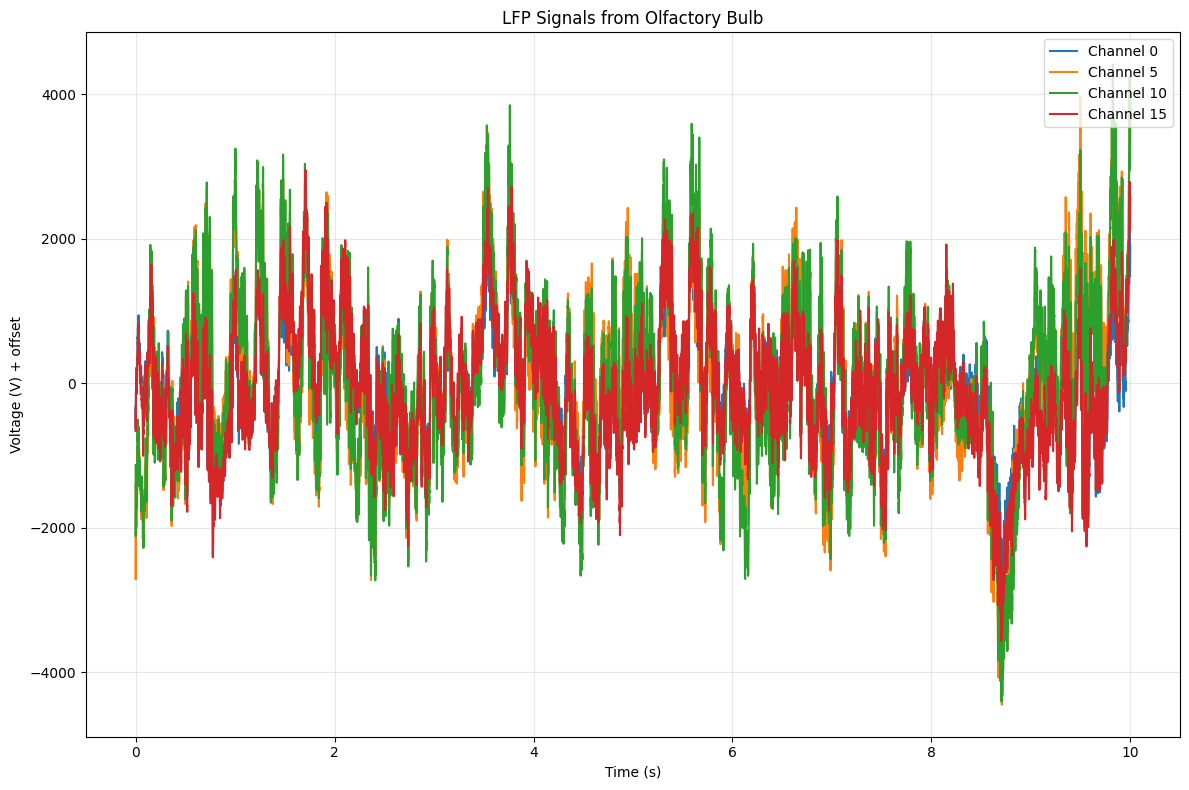

In [8]:
# Plot a segment of LFP data from multiple channels
time_slice = slice(0, 10000)  # Plot 10 seconds of data (at 1000 Hz)
time = np.arange(time_slice.start, time_slice.stop) / lfp.rate

plt.figure(figsize=(12, 8))
# Plot 4 channels with offset for visibility
channels_to_plot = [0, 5, 10, 15]  # Select a few channels
offsets = np.arange(len(channels_to_plot)) * 0.0005  # Offset for visibility

for i, ch in enumerate(channels_to_plot):
    plt.plot(time, lfp.data[time_slice, ch] + offsets[i], 
             label=f"Channel {ch}")

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V) + offset')
plt.title('LFP Signals from Olfactory Bulb')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2. Visualizing Sniffing Data

Let's visualize the raw sniffing signal and mark inhalation/exhalation events.

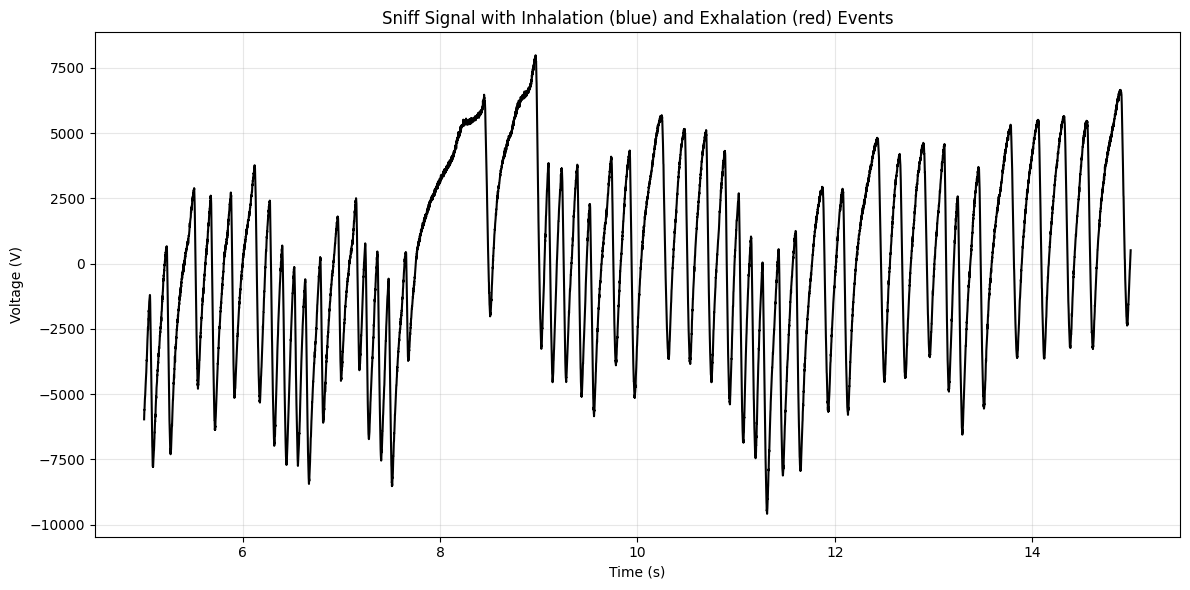

In [9]:
# Plot a segment of sniffing data with inhalation and exhalation times marked
time_slice = slice(5000, 15000)  # 10 seconds of data
time = np.arange(time_slice.start, time_slice.stop) / sniff.rate

# Filter inhalation and exhalation times that fall within our time window
inhalation_times = inhalation.timestamps[:]
exhalation_times = exhalation.timestamps[:]

# Find events that fall within our time window
inhale_mask = (inhalation_times >= time[0]) & (inhalation_times <= time[-1])
exhale_mask = (exhalation_times >= time[0]) & (exhalation_times <= time[-1])

inhale_events = inhalation_times[inhale_mask]
exhale_events = exhalation_times[exhale_mask]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time, sniff.data[time_slice], 'k', label='Sniff Signal')

# Plot inhalation and exhalation events as vertical lines
y_min, y_max = plt.ylim()
for t in inhale_events:
    plt.axvline(x=t, color='b', linestyle='--', alpha=0.5)
for t in exhale_events:
    plt.axvline(x=t, color='r', linestyle=':', alpha=0.5)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Sniff Signal with Inhalation (blue) and Exhalation (red) Events')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Analyzing Breathing Patterns

Let's analyze the breathing patterns by looking at the distribution of inhalation and exhalation durations.

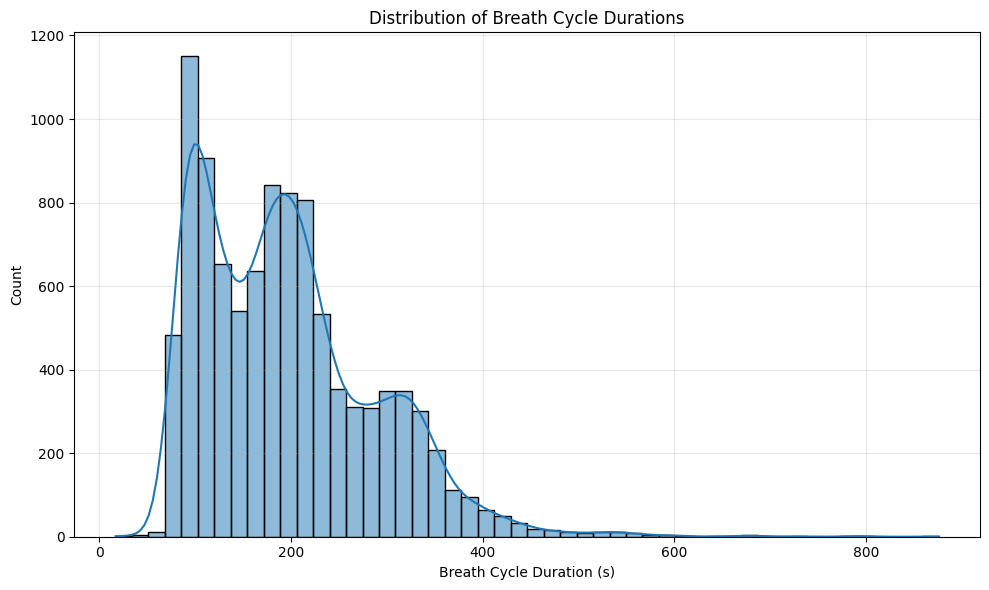

Mean breath cycle duration: 196.184 s
Median breath cycle duration: 184.000 s
Standard deviation: 90.950 s
Average respiration rate: 0.3 breaths/min


In [10]:
# Calculate breath cycle durations
# First, ensure the timestamps are sorted
inhale_times = np.sort(inhalation.timestamps[:])
exhale_times = np.sort(exhalation.timestamps[:])

# Calculate durations
breath_cycle_durations = []
min_length = min(len(inhale_times), len(exhale_times))

# Use the minimum number of events to avoid index errors
for i in range(min_length - 1):
    if i < len(inhale_times) - 1:
        inhale_to_inhale = inhale_times[i+1] - inhale_times[i]
        breath_cycle_durations.append(inhale_to_inhale)

# Plotting the distribution of breath cycle durations
plt.figure(figsize=(10, 6))
sns.histplot(breath_cycle_durations, bins=50, kde=True)
plt.xlabel('Breath Cycle Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Breath Cycle Durations')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate some statistics
mean_duration = np.mean(breath_cycle_durations)
median_duration = np.median(breath_cycle_durations)
std_duration = np.std(breath_cycle_durations)
respiration_rate = 60 / mean_duration  # breaths per minute

print(f"Mean breath cycle duration: {mean_duration:.3f} s")
print(f"Median breath cycle duration: {median_duration:.3f} s")
print(f"Standard deviation: {std_duration:.3f} s")
print(f"Average respiration rate: {respiration_rate:.1f} breaths/min")

### 4. Analyzing LFP Power Across Frequencies

Let's compute and visualize the power spectrum of the LFP data to see which frequency bands are dominant.

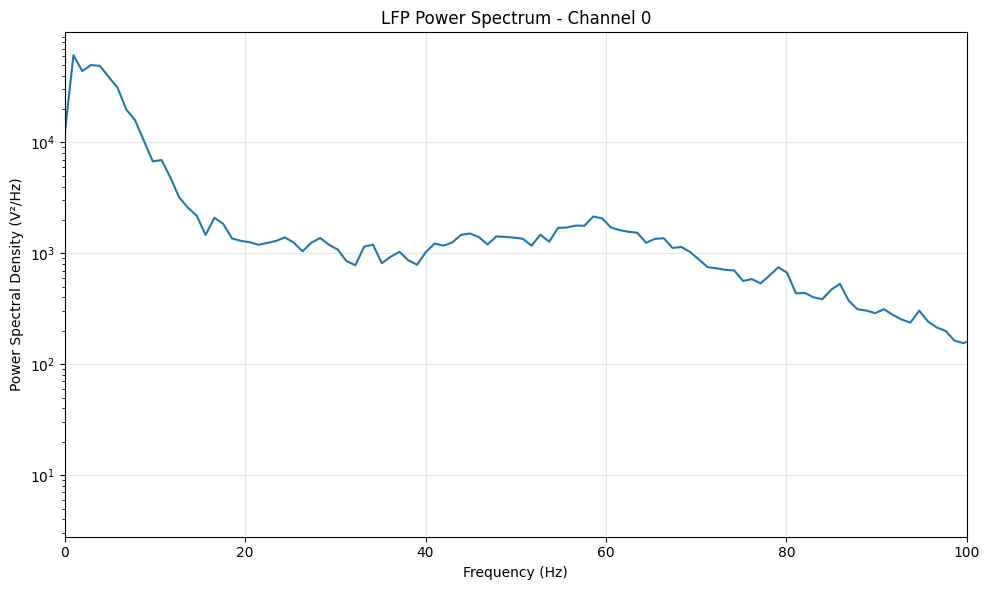

In [11]:
from scipy import signal

# Calculate power spectrum for a segment of LFP data
time_slice = slice(0, 30000)  # 30 seconds of data
# Use a single channel for demonstration
channel = 0

# Calculate power spectrum using Welch's method
fs = lfp.rate
f, Pxx = signal.welch(lfp.data[time_slice, channel], fs, nperseg=1024)

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.title(f'LFP Power Spectrum - Channel {channel}')
plt.xlim([0, 100])  # Focus on frequencies up to 100 Hz
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5. Exploring Relationship Between LFP and Breathing

Let's visualize how LFP activity relates to the breathing cycle.

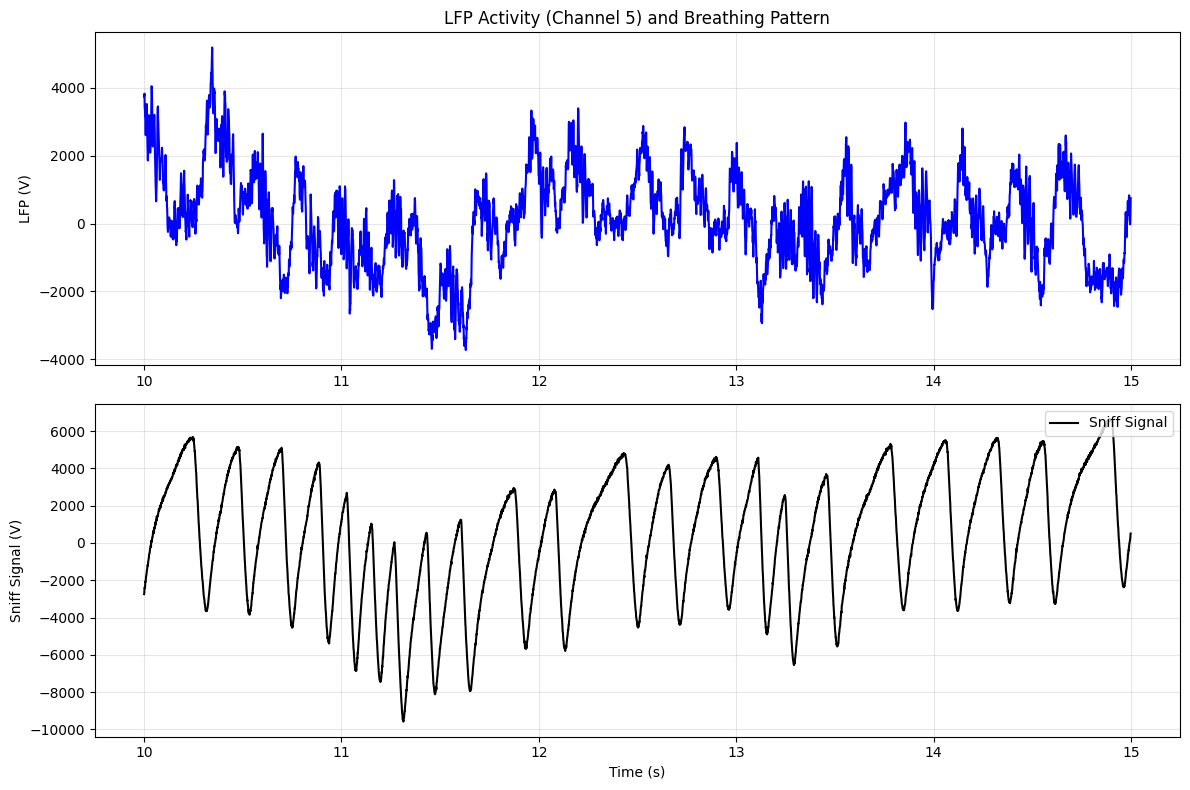

In [12]:
# Select a time window with clear breathing cycles
time_slice = slice(10000, 15000)  # 5 seconds of data
time = np.arange(time_slice.start, time_slice.stop) / lfp.rate

# Select a channel for LFP
channel = 5

plt.figure(figsize=(12, 8))

# Plot LFP data
ax1 = plt.subplot(2, 1, 1)
plt.plot(time, lfp.data[time_slice, channel], 'b')
plt.ylabel('LFP (V)')
plt.title(f'LFP Activity (Channel {channel}) and Breathing Pattern')
plt.grid(True, alpha=0.3)

# Plot sniffing data
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(time, sniff.data[time_slice], 'k')

# Mark inhalation and exhalation events
inhale_mask = (inhalation.timestamps[:] >= time[0]) & (inhalation.timestamps[:] <= time[-1])
exhale_mask = (exhalation.timestamps[:] >= time[0]) & (exhalation.timestamps[:] <= time[-1])

for t in inhalation.timestamps[inhale_mask]:
    plt.axvline(x=t, color='b', linestyle='--', alpha=0.5)
for t in exhalation.timestamps[exhale_mask]:
    plt.axvline(x=t, color='r', linestyle=':', alpha=0.5)

plt.xlabel('Time (s)')
plt.ylabel('Sniff Signal (V)')
plt.legend(['Sniff Signal', 'Inhalation', 'Exhalation'], loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

In this notebook, we explored Dandiset 001433, which contains recordings of sniffing behavior and olfactory bulb electrophysiology in freely-behaving mice. The dataset provides valuable information about breathing rhythms and neural activity in the olfactory bulb.

Some potential directions for further analysis:

- Investigate the relationship between breathing phase and LFP oscillations
- Compare breathing patterns across different mice in the dataset
- Analyze whether specific breathing patterns correlate with particular neural signatures
- Explore correlations between different frequency bands in the LFP data and the breathing cycle